<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# Extra code for sanity check and easier debugging
from pprint import pprint

# Code to read in SAT scores info
raw_sat = ''
sat_scores_file = 'sat_scores.csv'
with open(sat_scores_file, 'r') as f:
    lines = f.readlines()

# Remove line break for each rows
for i in range(len(lines)):
    lines[i] = lines[i].replace('\n', '')

# Construct header before feeding into dictionary
header = [head for head in lines[0].split(',')]

# Build dictionary
data = {}
for key in header:
    data[key]=[] # Populate dictionary keys

# Populate dictionary values & skipping
# 1st row which is header row
for i in range(len(lines)-1):
    line = lines[i+1].split(',') # skip row 0
    for index, key in enumerate(data.keys()):
        data[key].append(line[index])
        

In [3]:
# Change numerical values to integer
for key in data.keys():
    if key not in 'State': # State are strings
        for index, value in enumerate(data[key]):
            data[key][index]=int(value)


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
# Create SAT dataframe using dictionary built earlier
sat_dict = pd.DataFrame(data)

# Create SAT dataframe by importing CSV
csv_file = 'sat_scores.csv'
sat_csv = pd.read_csv(csv_file)


In [5]:
sat_dict.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [6]:
sat_csv.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

#### Adrian's Answer: There is no visible difference between loading from file and constructing from dictionary built earlier. I cast the numerical strings to integer in the previous section.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
sat_csv.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


#### Adrian's Answer: This looks like a summary of Verbal and Math SAT scores for all states in USA. "Rate" could be the percentage of students in that state taking the SAT.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
# Data dictionary ***
# sat_csv = {'State': type string [all the abbreviated states in USA],
#            'Rate': type int64 [percentage of students in that state that are taking SAT],
#            'Verbal': type int64 [state average for Verbal section SAT score],
#            'Math': type int64 [state average for Math section SAT score]
#           } dictionary of 4 keys and 52 values per key

In [9]:
# Last entry in CSV is weird, there is no state called 'All' in the USA.
# Possibly an average for all districts/counties across all 50 states + DC area
# Prepared below code to slice off last row
sat_csv = sat_csv[:-1]
sat_csv

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [10]:
sat_csv.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0, 0.5, 'No. of States')

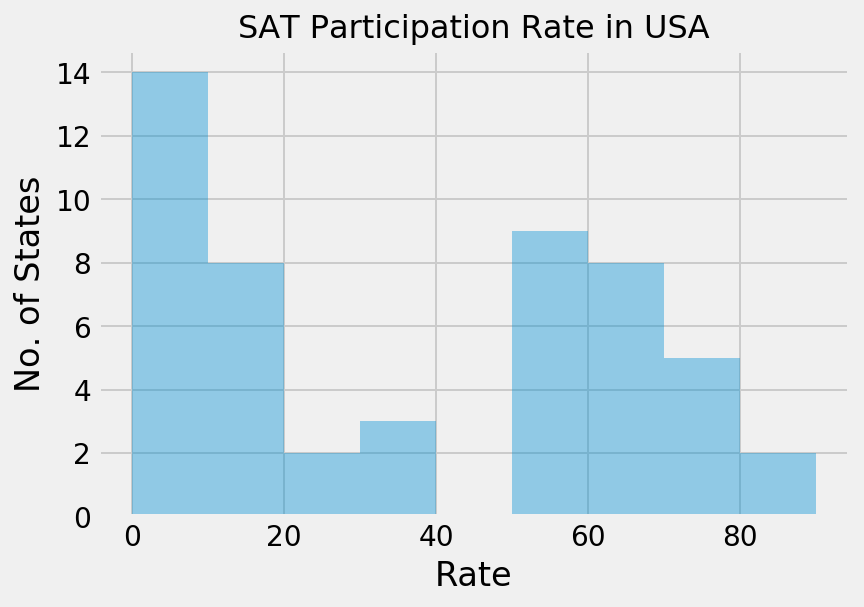

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Rate is between [4, 82]. So endpoints are rounded accordingly for the bins of size 10.
sns.distplot(sat_csv['Rate'], kde=False, bins=range(0,100,10))
plt.title('SAT Participation Rate in USA', fontsize=16)
plt.ylabel('No. of States')

Text(0, 0.5, 'No. of States')

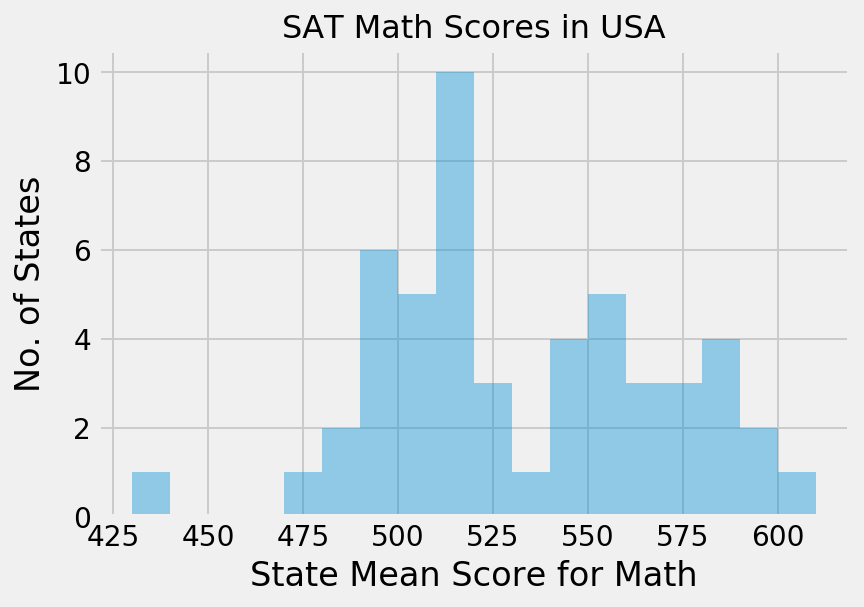

In [12]:
# Math is between [439, 603]
sns.distplot(sat_csv['Math'], kde=False, bins=range(430,620,10), axlabel='State Mean Score for Math')
plt.title('SAT Math Scores in USA', fontsize=16)
plt.ylabel('No. of States')

Text(0, 0.5, 'No. of States')

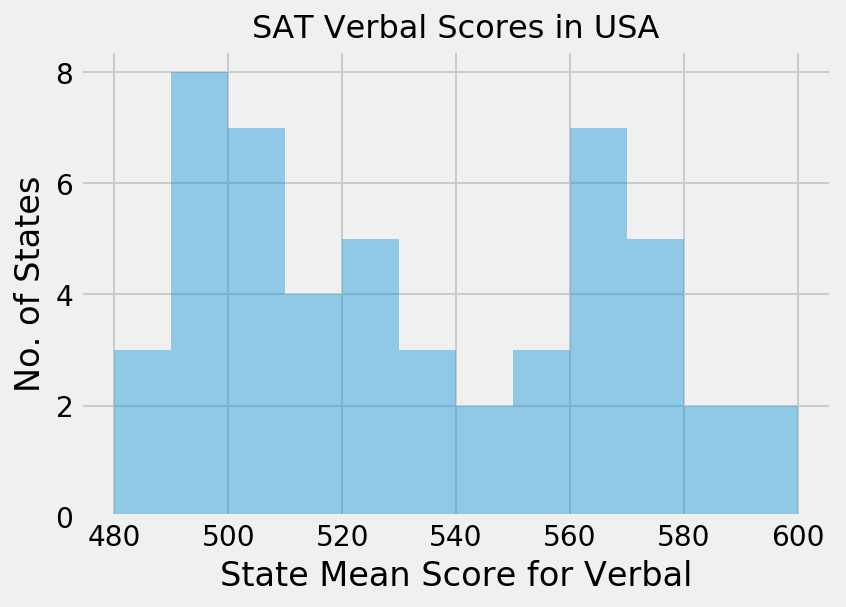

In [13]:
# Verbal is between [482, 593]
sns.distplot(sat_csv['Verbal'], kde=False, bins=range(480,610,10), axlabel='State Mean Score for Verbal')
plt.title('SAT Verbal Scores in USA', fontsize=16)
plt.ylabel('No. of States')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

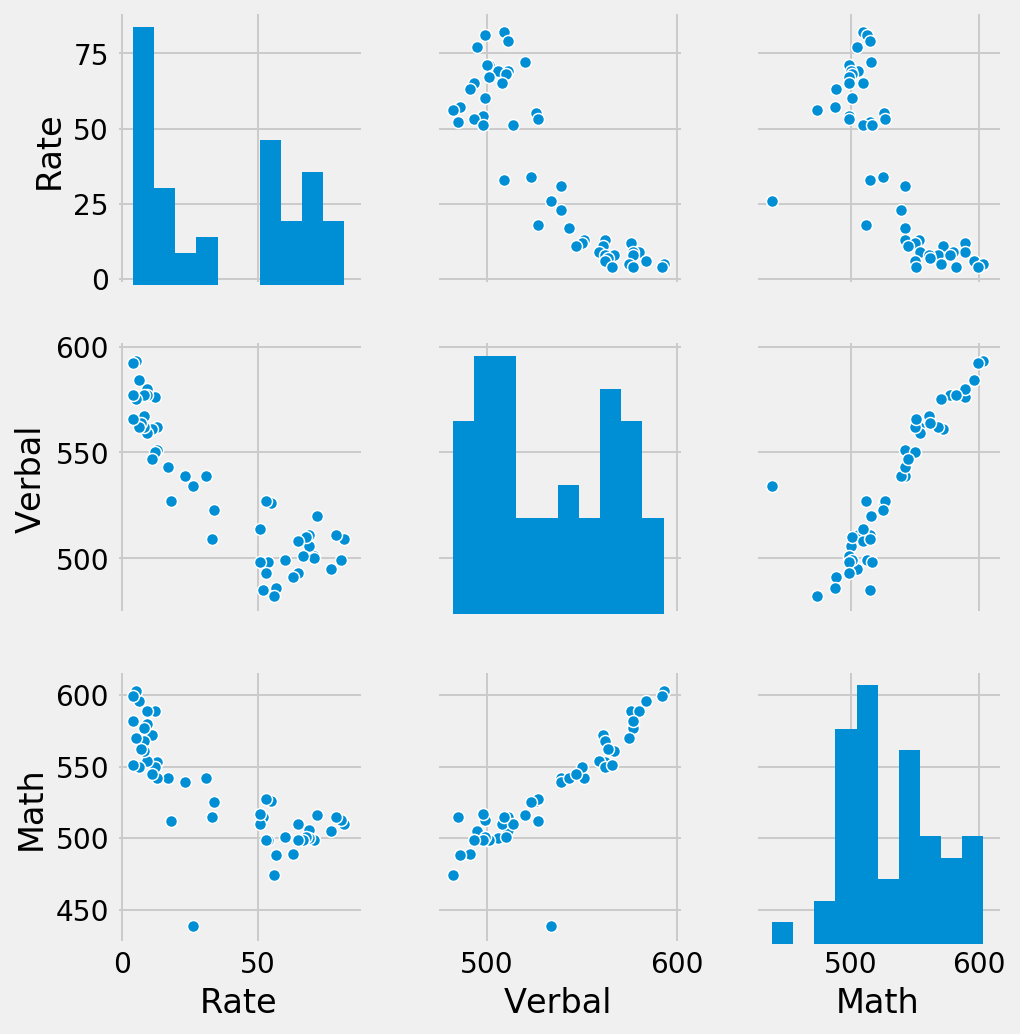

In [14]:
sns.pairplot(sat_csv)

#### Adrian's Answer:
The pair plot shows that there is a strong positive correlation between Math and Verbal scores. This suggests that students who do well for the Verbal section will also do well for the Math section, and vice versa.

There is a negative correlation between Rate vs Math or Verbal scores respectively. As more students take SAT, the state average score for each section (both Math and Verbal) is pulled down.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

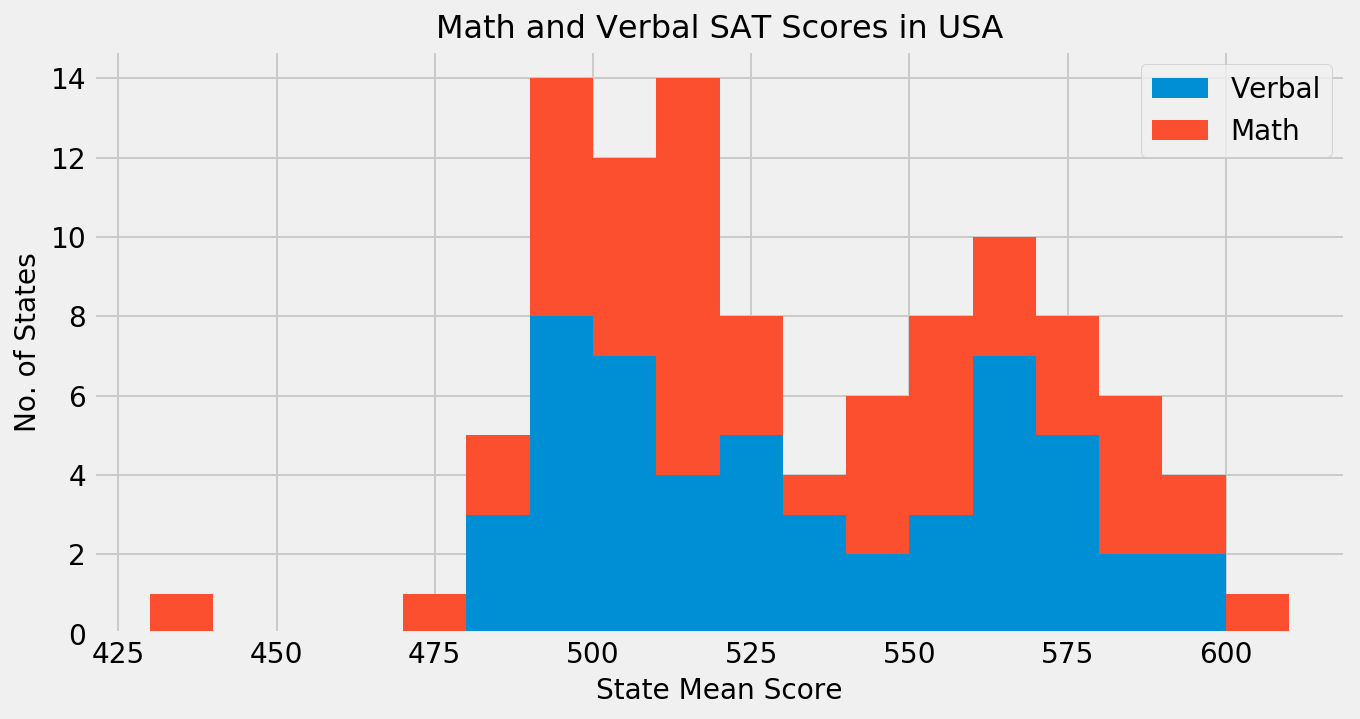

In [15]:
ax = sat_csv[['Verbal', 'Math']].plot(kind='hist', stacked=True, figsize=(10,5),
                                      bins=range(430,620,10), grid=True)

ax.set_title('Math and Verbal SAT Scores in USA', fontsize=16, y=1)
ax.set_ylabel('No. of States', fontsize=14)
ax.set_xlabel('State Mean Score', fontsize=14)
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

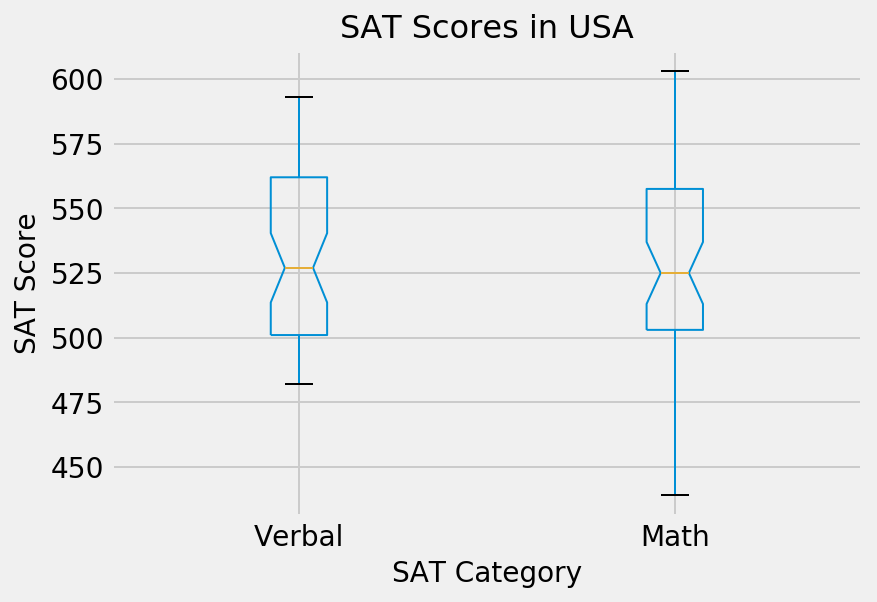

In [16]:
ax = sat_csv.boxplot(column=['Verbal','Math'], notch=True)

ax.set_title('SAT Scores in USA', fontsize=16, y=1)
ax.set_ylabel('SAT Score', fontsize=14)
ax.set_xlabel('SAT Category', fontsize=14);

#### Adrian's Answer:
> What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

With the boxplot, the 5 measures (min, 25th percentile, median, 75th percentile, max) can be seen visually for each category. Outliers can also be shown easily.

> What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?

Rate is within the range 4 to 82 whilst Math and Verbal scores are within the range of 439 to 603 and 482 to 593 respectively. Since they have a different scale/order of magnitude, they need to be compressed in order to fit within the same chart, rendering it difficult to grasp the 5 measures and distributions for each category.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


#### Adrian's Answer:
Standardise all 3 variables so that it is meaningful to make comparisons on the same chart. This will ensure that all 3 variables will have mean 0 and standard deviation 1.

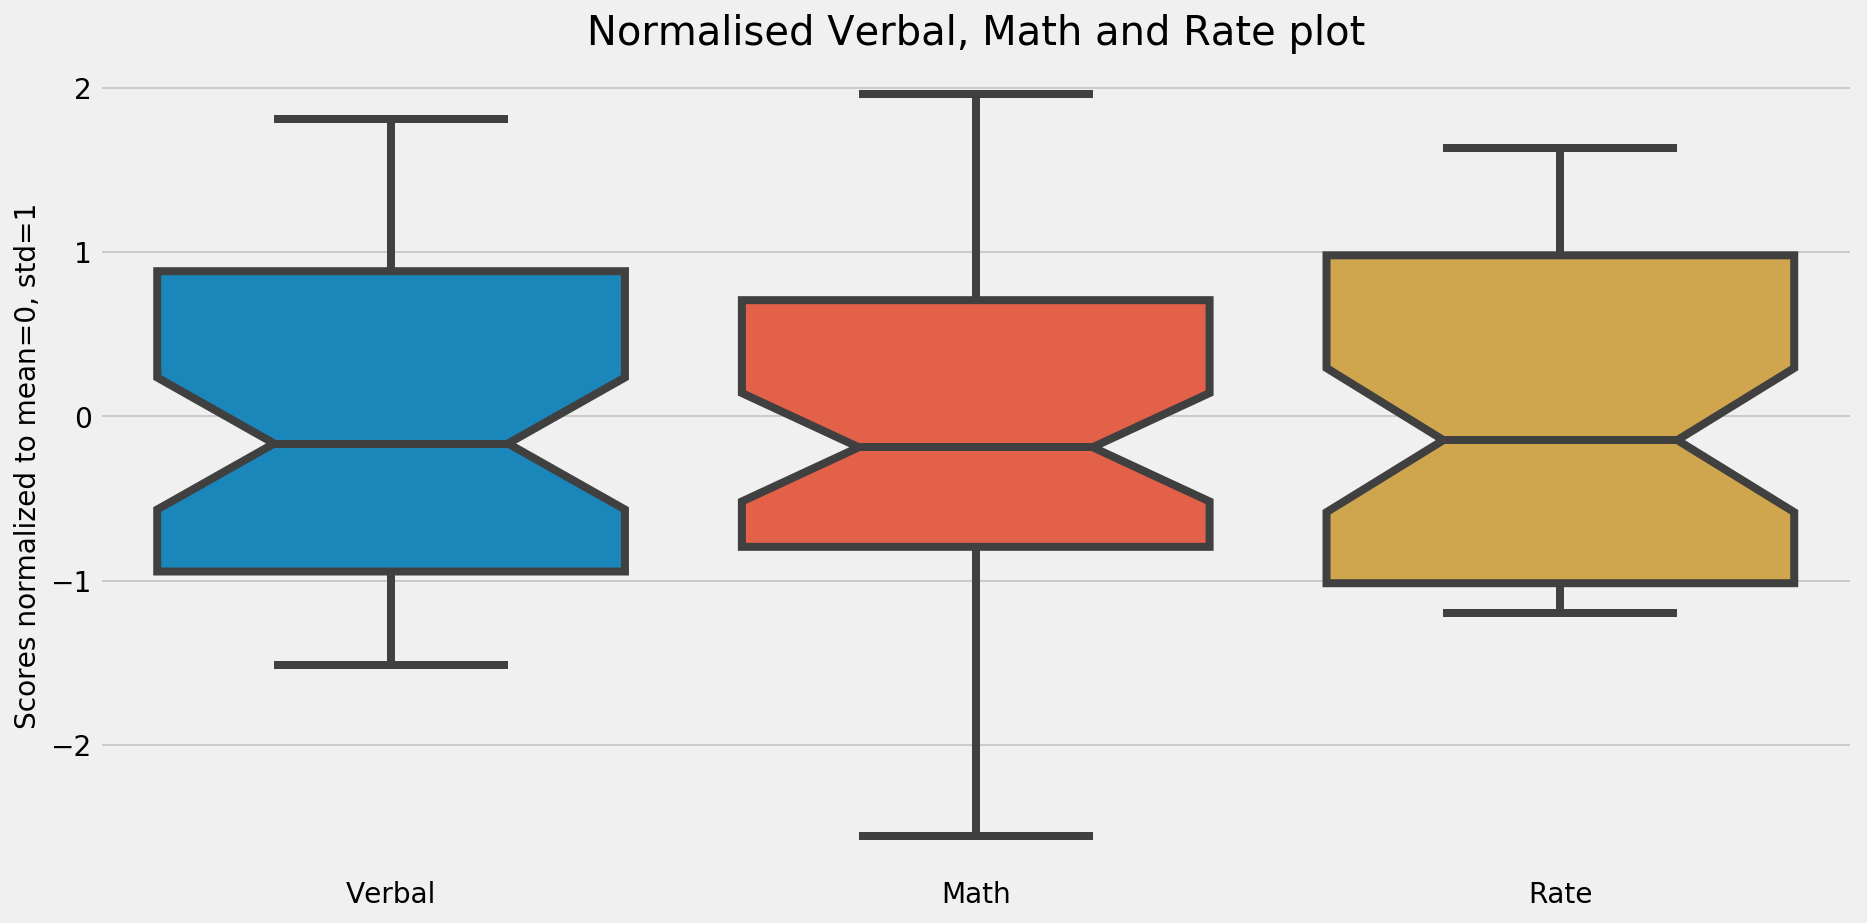

In [17]:
sat_norm = sat_csv[['Verbal','Math','Rate']]
sat_norm = (sat_norm - sat_norm.mean()) / sat_norm.std()

fig = plt.figure(figsize=(14,7))
ax = fig.gca()
ax = sns.boxplot(data=sat_norm, ax=ax, notch=True)

ax.set_title('Normalised Verbal, Math and Rate plot', fontsize=20)
ax.set_ylabel('Scores normalized to mean=0, std=1', fontsize=14)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [18]:
greater_mean = sat_csv[(sat_csv['Verbal'] > sat_csv['Verbal'].mean())]
greater_mean

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [19]:
print('Average of Verbal score across states: {}'.format(sat_csv['Verbal'].mean()))
print('Median of Verbal score across states: {}\n'.format(sat_csv['Verbal'].median()))
print(greater_mean.count())

Average of Verbal score across states: 532.5294117647059
Median of Verbal score across states: 527.0

State     24
Rate      24
Verbal    24
Math      24
dtype: int64


#### Adrian's Answer:
There are 24 states above the mean, which means slightly less than half of all the 50 states and DC area of the US exceeded the national average of 532.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [20]:
greater_median = sat_csv[(sat_csv['Verbal'] > sat_csv['Verbal'].median())]
greater_median

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [21]:
print(greater_median.count())

State     24
Rate      24
Verbal    24
Math      24
dtype: int64


#### Adrian's Answer:
The number of states (24 states) with Verbal scores greater than the national median is more than the number of states with Verbal scores great than the national average. As the median is less than the mean, this means that the distribution is skewed to the right.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [22]:
sat_csv['Difference'] = sat_csv['Verbal'] - sat_csv['Math']
sat_csv

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [23]:
# Build dataframe for top 10 states where Verbal > Math
# This would mean to extract states with largest 'Difference' values
Verbal_Math_Top10 = sat_csv.sort_values('Difference', ascending=False).head(10)
Verbal_Math_Top10.reset_index(drop=True, inplace=True) # Readjust index for ranking

# Build dataframe top 10 states where Math > Verbal
# This would mean to extract states with smallest 'Difference' values
Math_Verbal_Top10 = sat_csv.sort_values('Difference', ascending=True).head(10)
Math_Verbal_Top10.reset_index(drop=True, inplace=True) # Readjust index for ranking

print('Top states where Verbal scores are greater than Math scores:')
print(Verbal_Math_Top10.head(3))
print('\nTop states where Math scores are greater than Verbal scores:')
print(Math_Verbal_Top10.head(3))


Top states where Verbal scores are greater than Math scores:
  State  Rate  Verbal  Math  Difference
0    OH    26     534   439          95
1    MS     4     566   551          15
2    WV    18     527   512          15

Top states where Math scores are greater than Verbal scores:
  State  Rate  Verbal  Math  Difference
0    HI    52     485   515         -30
1    CA    51     498   517         -19
2    NJ    81     499   513         -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [24]:
sat_csv.loc[:,['Rate','Verbal','Math','Difference']].corr()

,Rate,Verbal,Math,Difference
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Difference,-0.098671,0.044527,-0.395574,1.000000


#### Adrian's Answer:
The correlation coefficient between Verbal and Math scores are close to 1, suggesting a strong linear correlation between both variables. This suggests that students doing well in one section tends to well in the other section too.

'Difference' is a dependent variable, derived from both Verbal and Math scores. Hence it is not meaningful to interpret the correlation coefficient between 'Difference' vs the other two variables.

'Rate' has a strong negative correlation with 'Verbal' and 'Math'.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [25]:
sat_csv.describe()

,Rate,Verbal,Math,Difference
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


#### Adrian's Answer:
Count:
This shows the number of states in the USA. There are 50 states plus the federal district (Washington DC).

Mean:
This shows the average value for each column. The average for each state's participation rate is 37%. On average, students score 532.5 for the Verbal section and 531.8 for the Math section.

Std:
This shows the standard deviation for each column. We can assume that most values for each column will fall within their respective mean+/-std.

Min:
This shows the smallest value for each column.

25%:
This shows the 25th percentile or 1st quartile for each column.

50%:
This shows the 50th percentile or median for each column.

75&:
This shows the 75th percentile or 3rd quartile for each column.

Max:
This shows the largest value for each column.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [26]:
sat_csv.cov()

,Rate,Verbal,Math,Difference
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Difference,-43.06,23.529412,-227.370196,250.899608


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [27]:
# Pull out definition table from above URL
# X-use = Percentage of those in an age group who used X in the past 12 months
# X-frequency = Median number of times a user in an age group used X in the past 12 months
# Where X is one of the 13 drug types

In [28]:
csv_file = 'drug-use-by-age.csv'
drug_use = pd.read_csv(csv_file)

# Quick check of dataframe shape
print("Dataframe dimensions (row, col): {}".format(drug_use.shape))

# Quick, random peek at the dataframe contents
drug_use.sample(5)

Dataframe dimensions (row, col): (17, 28)


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0


In [29]:
# Check the dtypes for each column, see whether it gels with the sample taken above.
drug_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [30]:
drug_use.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


#### Adrian's Answer:
Some form of cleaning is required. We expected to see int64 or float64 dtypes for all 28 columns, but only 21 columns reported results from .describe(), suggesting some non-numerical, string like values in those 7 columns. Those non-compliant column/row needs to be inspected to determine whether to ignore, exclude or convert them into suitable numerical form.

There is no column with empty or NaN cell, all columns reported 17 non-null values/rows.


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [31]:
# Start with some data cleaning
# Shortlist which columns in dataframe is of dtype "object"
object_list = [column for column in drug_use.columns if drug_use[column].dtypes==object]
object_list

['age',
 'cocaine-frequency',
 'crack-frequency',
 'heroin-frequency',
 'inhalant-frequency',
 'oxycontin-frequency',
 'meth-frequency']

In [32]:
# Take a closer look at those 7 columns
drug_use[object_list]

,age,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,12,5.0,-,35.5,19.0,24.5,-
1,13,1.0,3.0,-,12.0,41.0,5.0
2,14,5.5,-,2.0,5.0,4.5,24.0
3,15,4.0,9.5,1.0,5.5,3.0,10.5
4,16,7.0,1.0,66.5,3.0,4.0,36.0
5,17,5.0,21.0,64.0,4.0,6.0,48.0
6,18,5.0,10.0,46.0,4.0,7.0,12.0
7,19,5.5,2.0,180.0,3.0,7.5,105.0
8,20,8.0,5.0,45.0,4.0,12.0,12.0
9,21,5.0,17.0,30.0,2.0,13.5,2.0


In [33]:
# Manually pull out and check the above 6 drugs' column pairs
drug_use[['cocaine-use','cocaine-frequency','crack-use','crack-frequency','heroin-use','heroin-frequency',
          'inhalant-use','inhalant-frequency','oxycontin-use','oxycontin-frequency','meth-use','meth-frequency']]

,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,inhalant-use,inhalant-frequency,oxycontin-use,oxycontin-frequency,meth-use,meth-frequency
0,0.1,5.0,0.0,-,0.1,35.5,1.6,19.0,0.1,24.5,0.0,-
1,0.1,1.0,0.0,3.0,0.0,-,2.5,12.0,0.1,41.0,0.1,5.0
2,0.1,5.5,0.0,-,0.1,2.0,2.6,5.0,0.4,4.5,0.1,24.0
3,0.5,4.0,0.1,9.5,0.2,1.0,2.5,5.5,0.8,3.0,0.3,10.5
4,1.0,7.0,0.0,1.0,0.1,66.5,3.0,3.0,1.1,4.0,0.3,36.0
5,2.0,5.0,0.1,21.0,0.1,64.0,2.0,4.0,1.4,6.0,0.6,48.0
6,3.2,5.0,0.4,10.0,0.4,46.0,1.8,4.0,1.7,7.0,0.5,12.0
7,4.1,5.5,0.5,2.0,0.5,180.0,1.4,3.0,1.5,7.5,0.4,105.0
8,4.9,8.0,0.6,5.0,0.9,45.0,1.5,4.0,1.7,12.0,0.9,12.0
9,4.8,5.0,0.5,17.0,0.6,30.0,1.4,2.0,1.3,13.5,0.6,2.0


#### Adrian's Conclusion:

Treat 'age' as bins for each age group -> leave it as string type

Noticed that '-' are associated with '0.0' for their respective pairs under 'use' column -> will assume '-' represents negligible value and convert to 0.0. Then lastly, convert all remaining 6 columns to float type to facilitate computation.

In [34]:
# Start cleaning up. Convert numerical string to float, and '-' to 0.0
for column in ['cocaine-frequency', 'crack-frequency', 'heroin-frequency',
               'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']:
    for row in drug_use.index:
        try:
            drug_use.loc[row, column] = float(drug_use.loc[row, column])
        except ValueError:
            drug_use.loc[row, column] = float(0.0)
    # Remember to convert column dtype to float to allow computation later on
    drug_use[column] = drug_use[column].astype(float)

drug_use.head(8)         


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0


In [35]:
drug_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [36]:
# Taking a quick, high level overview of cleaned data
drug_use.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [37]:
# Manually segregate 'use' columns and 'frequency' columns
col_use = [column for column in drug_use.columns if 'use' in column]
col_frequency = [column for column in drug_use.columns if 'frequency' in column]

In [38]:
# Create a subset dataframe involving just the 'use' columns
abuse_ratio = drug_use.loc[:, ['age', *col_use]]

# Create a subset dataframe involving just the 'frequency' columns
abuse_frequency = drug_use.loc[:,['age', *col_frequency]]


In [39]:
abuse_ratio.head(10)

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


In [40]:
abuse_ratio.describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Text xticklabel objects>)

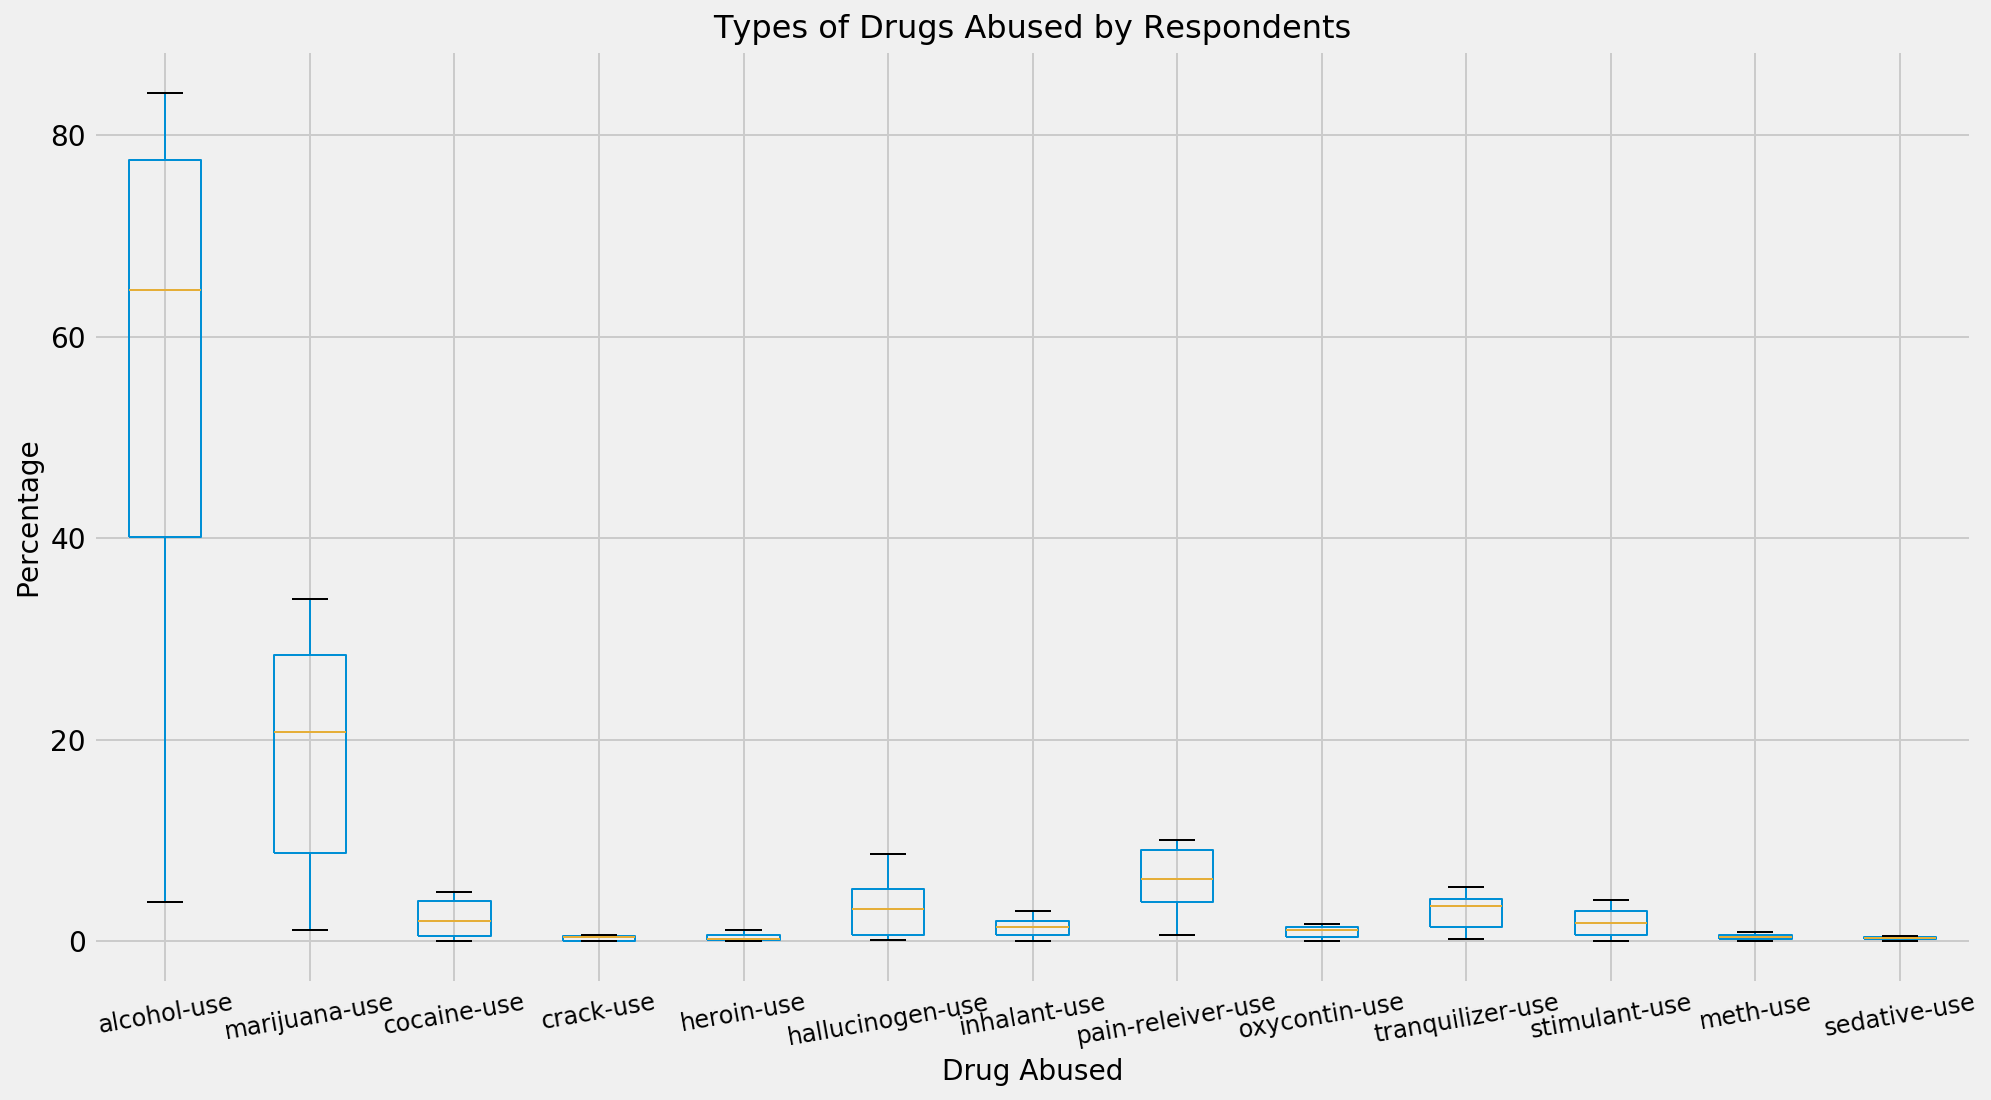

In [41]:
ax =abuse_ratio.boxplot(figsize=(15,8))

ax.set_title('Types of Drugs Abused by Respondents', fontsize=16, y=1)
ax.set_xlabel('Drug Abused', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)

plt.xticks(rotation=10, fontsize=12)

#### Adrian's Observation:
Alcohol and marijuana are the most highly abused drugs, their median(s) are skewed towards the upper side. This is could be due to ease of access or they might be uncontrolled drugs.

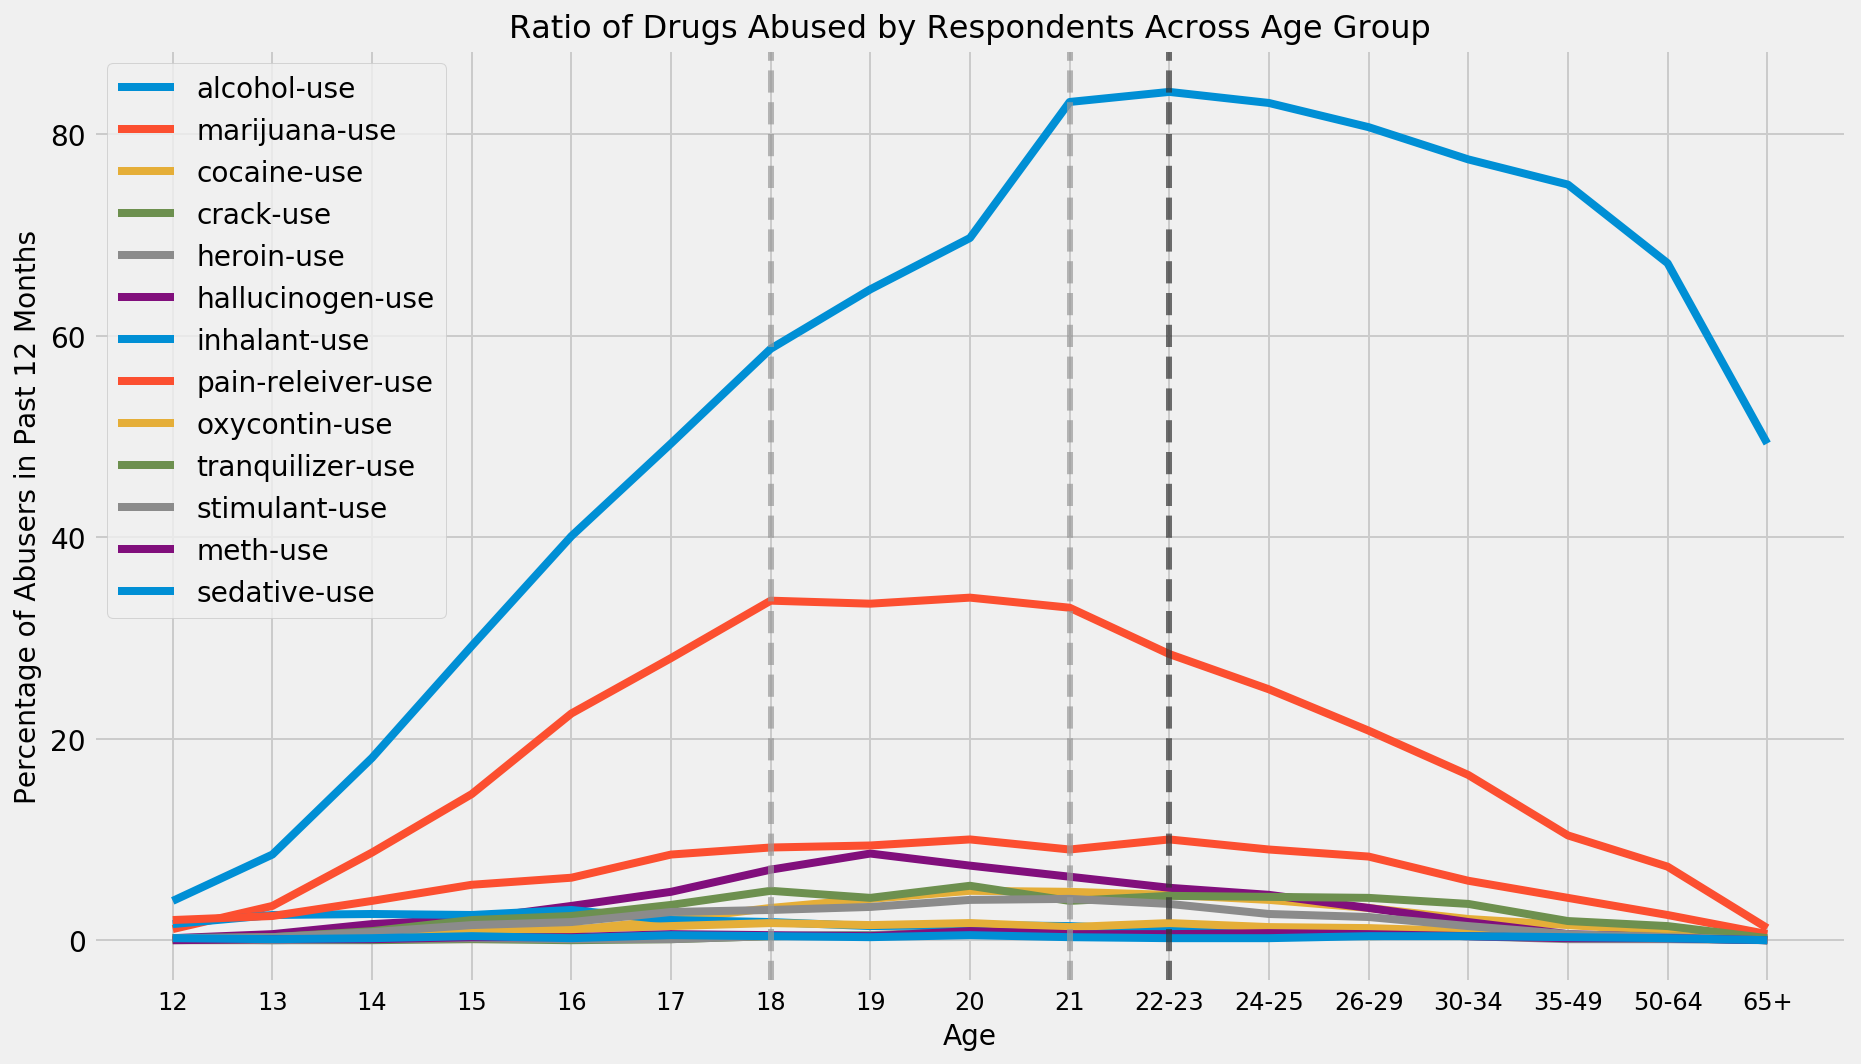

In [42]:
ax = abuse_ratio.plot(figsize=(14,8))
plt.xticks(range(0,17), abuse_ratio['age'], fontsize=12)
ax.set_title('Ratio of Drugs Abused by Respondents Across Age Group', fontsize=16, y=1)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Percentage of Abusers in Past 12 Months', fontsize=14)

# Alcohol abusers maxed out around age '22-23', bin index 10
ax.axvline(10, ls='dashed', lw=3, color='#333333', alpha=0.7)

# Marijuana abusers maxed out around age '18-21', bin index 6 to 9
ax.axvline(6, ls='dashed', lw=3, color='#999999', alpha=0.7)
ax.axvline(9, ls='dashed', lw=3, color='#999999', alpha=0.7)


#### Adrian's Observation:
In general, drug abuse goes up as age increases (from 12-21). Alcohol abuse sees the steepest increase, maxing out around 84% at the 22-23 age group. This is followed by marijuana abuse that maxes out around 33% at the 18-21 age group.

Drug abuse across all age group starts to decline from the mid 20s onwards.

In [43]:
abuse_ratio.corr()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
alcohol-use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana-use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine-use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack-use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin-use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen-use,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant-use,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
pain-releiver-use,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666
oxycontin-use,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929
tranquilizer-use,0.735785,0.935199,0.920430,0.772651,0.818583,0.862900,-0.103745,0.959283,0.955081,1.000000,0.909784,0.936270,0.674618


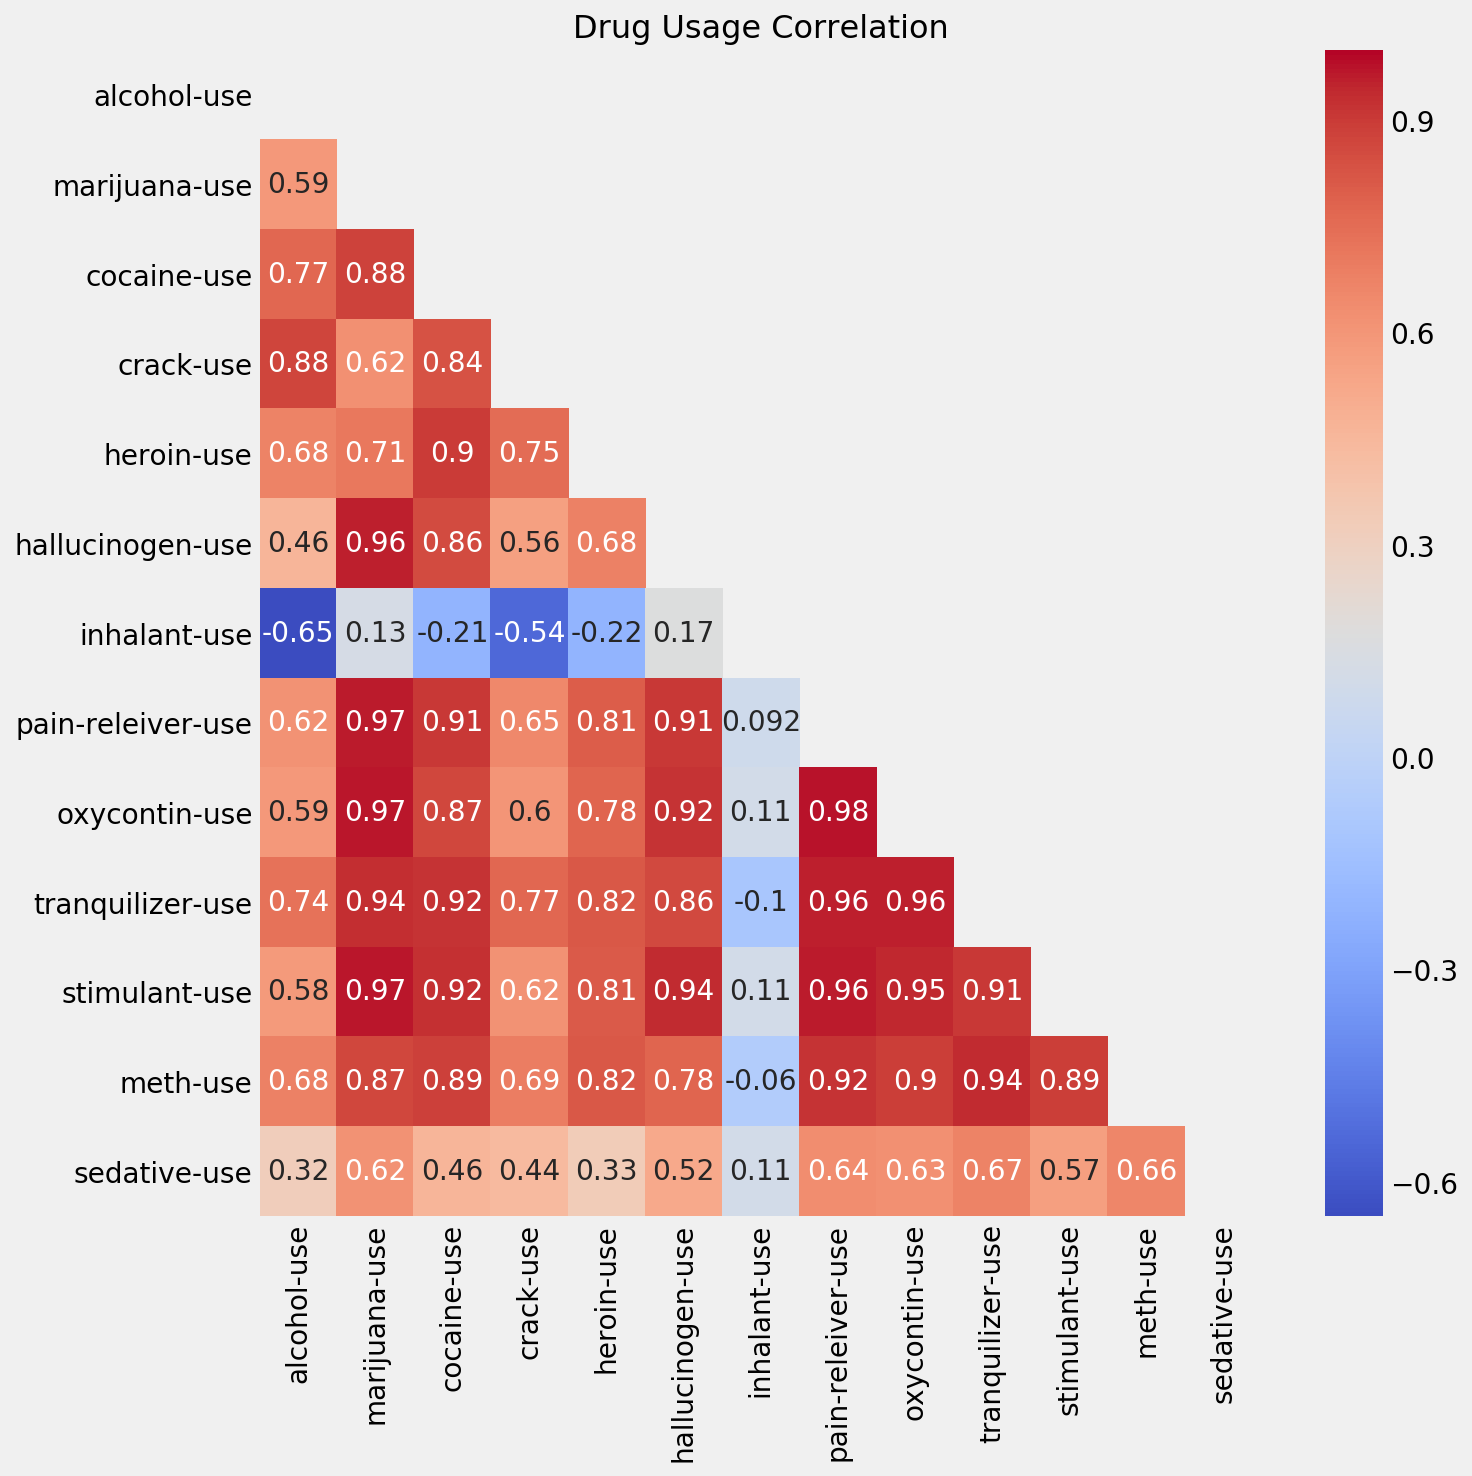

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Drug Usage Correlation', fontsize=16)
abuse_ratio = abuse_ratio.corr()
mask = np.zeros_like(abuse_ratio, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(abuse_ratio, mask=mask, annot=True, cmap='coolwarm')

#### Adrian's Observation:
Pain reliever/oxycontin/tranquilizer/stimulant/meth usage has a strong positive correlation amongst one another, abuser using any one is more likely to try out the other.

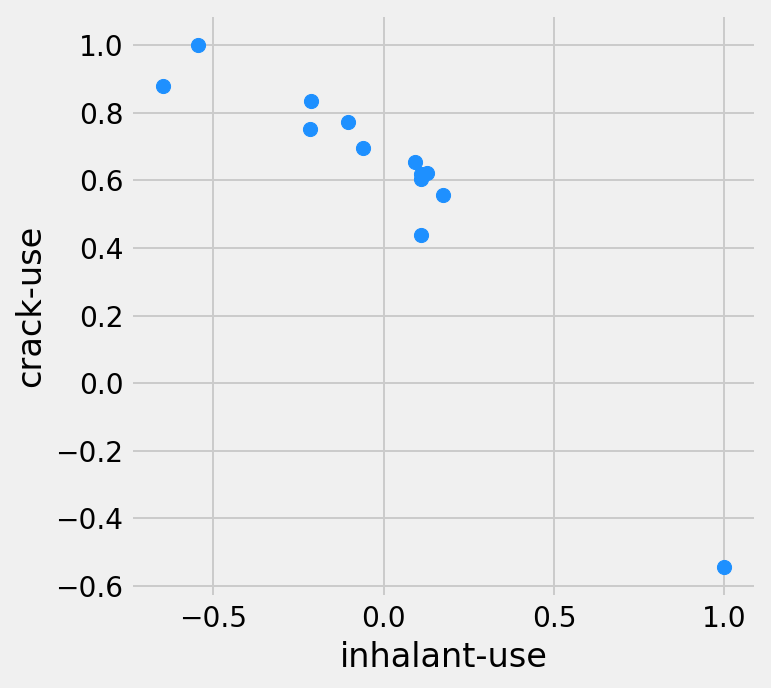

In [45]:
ax = abuse_ratio.plot(x='inhalant-use', y='crack-use', kind='scatter', c='dodgerblue', figsize=(5,5), s=50)

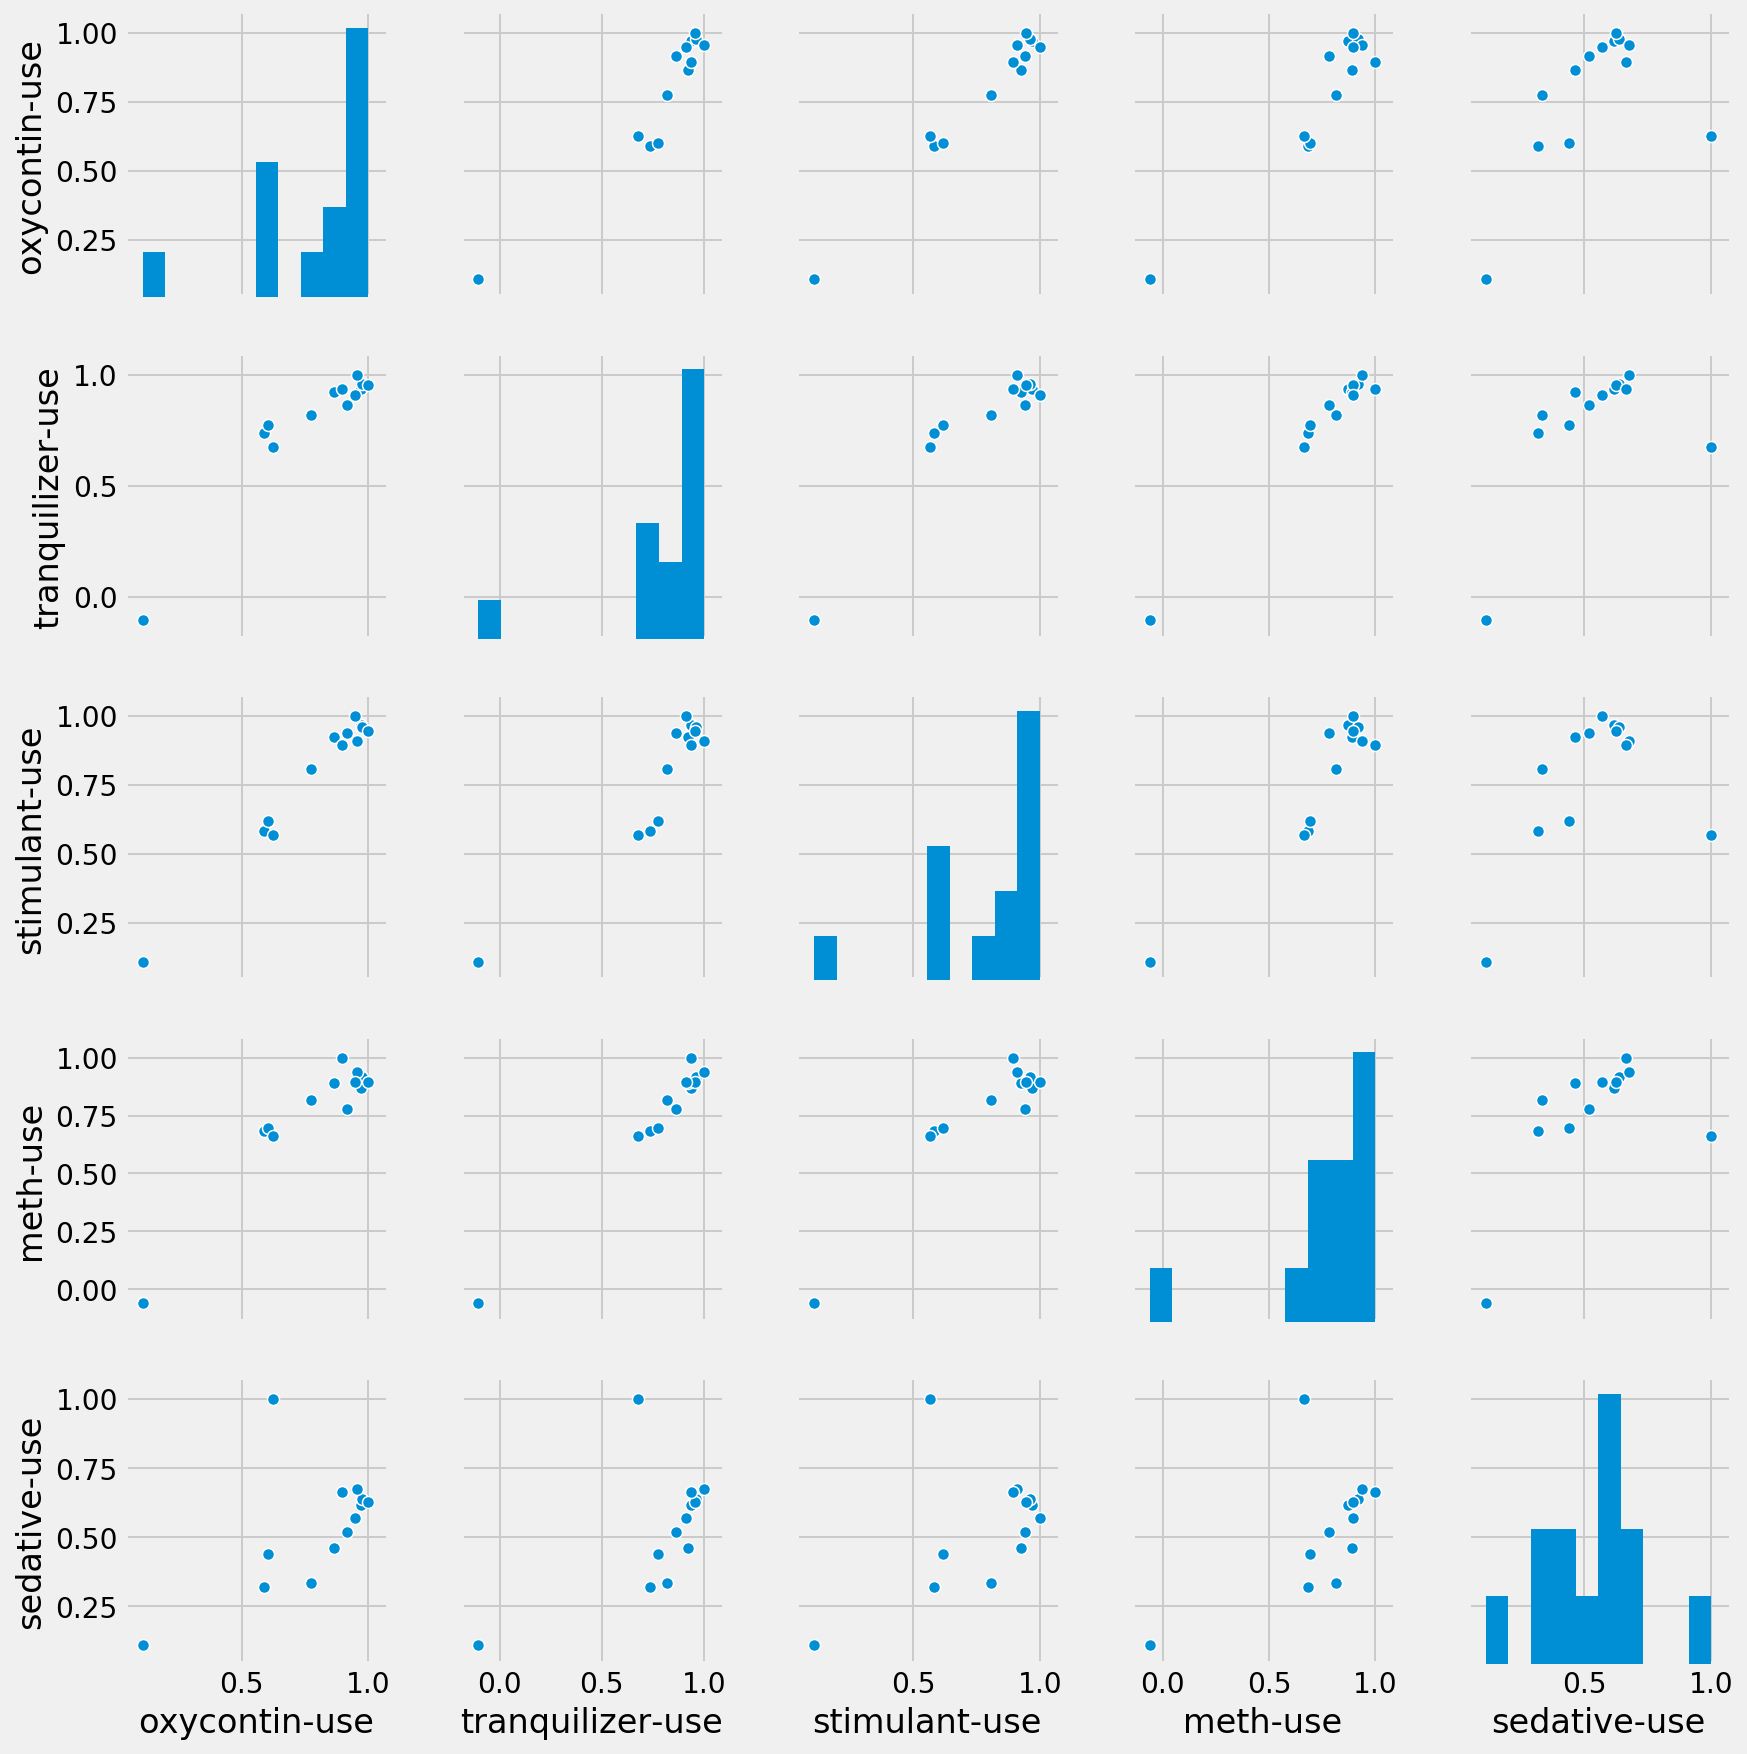

In [46]:
# Taking a closer look at relationship between pain reliever/oxycontin/tranquilizer/stimulant/meth
sns.pairplot(abuse_ratio.iloc[:,[*range(8,13)]]) # Need to use * to access all cols within range!

# These 5 have strong linear correlation

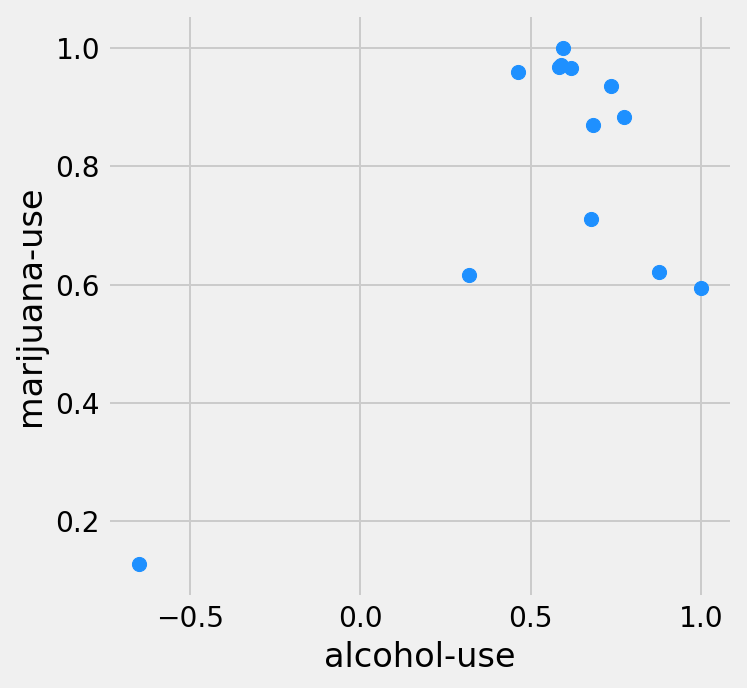

In [47]:
ax = abuse_ratio.plot(x='alcohol-use', y='marijuana-use', kind='scatter', c='dodgerblue', figsize=(5,5), s=50)
# There may be some form of positive correlation between alchohol usage vs marijuana usage. Worth checking out...

In [48]:
# Start looking at the 'frequency' side of data
abuse_frequency.head(10)

,age,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0
1,13,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,5.0,24.0,5.5,0.0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0
5,17,13.0,36.0,5.0,21.0,64.0,3.0,4.0,9.0,6.0,7.0,9.0,48.0,6.5
6,18,24.0,52.0,5.0,10.0,46.0,4.0,4.0,12.0,7.0,12.0,8.0,12.0,10.0
7,19,36.0,60.0,5.5,2.0,180.0,3.0,3.0,12.0,7.5,4.5,6.0,105.0,6.0
8,20,48.0,60.0,8.0,5.0,45.0,2.0,4.0,10.0,12.0,10.0,12.0,12.0,4.0
9,21,52.0,52.0,5.0,17.0,30.0,4.0,2.0,15.0,13.5,7.0,10.0,2.0,9.0


In [49]:
abuse_frequency.describe()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,33.352941,42.941176,7.411765,12.382353,68.970588,8.411765,5.794118,14.705882,13.941176,11.735294,31.147059,31.735294,19.382353
std,21.318833,18.362566,8.014119,17.361532,70.153285,15.000245,4.937291,6.935098,12.902134,11.485205,85.973790,32.206423,24.833527
min,3.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,7.000000,0.000000,4.500000,2.000000,0.000000,3.000000
25%,10.000000,30.000000,5.000000,2.000000,35.500000,3.000000,3.000000,12.000000,5.000000,6.000000,7.000000,10.500000,6.500000
50%,48.000000,52.000000,5.000000,6.000000,50.000000,3.000000,4.000000,12.000000,12.000000,10.000000,10.000000,24.000000,10.000000
75%,52.000000,52.000000,7.000000,15.000000,66.500000,4.000000,5.500000,15.000000,17.500000,11.000000,12.000000,46.000000,17.500000
max,52.000000,72.000000,36.000000,62.000000,280.000000,52.000000,19.000000,36.000000,46.000000,52.000000,364.000000,105.000000,104.000000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Text xticklabel objects>)

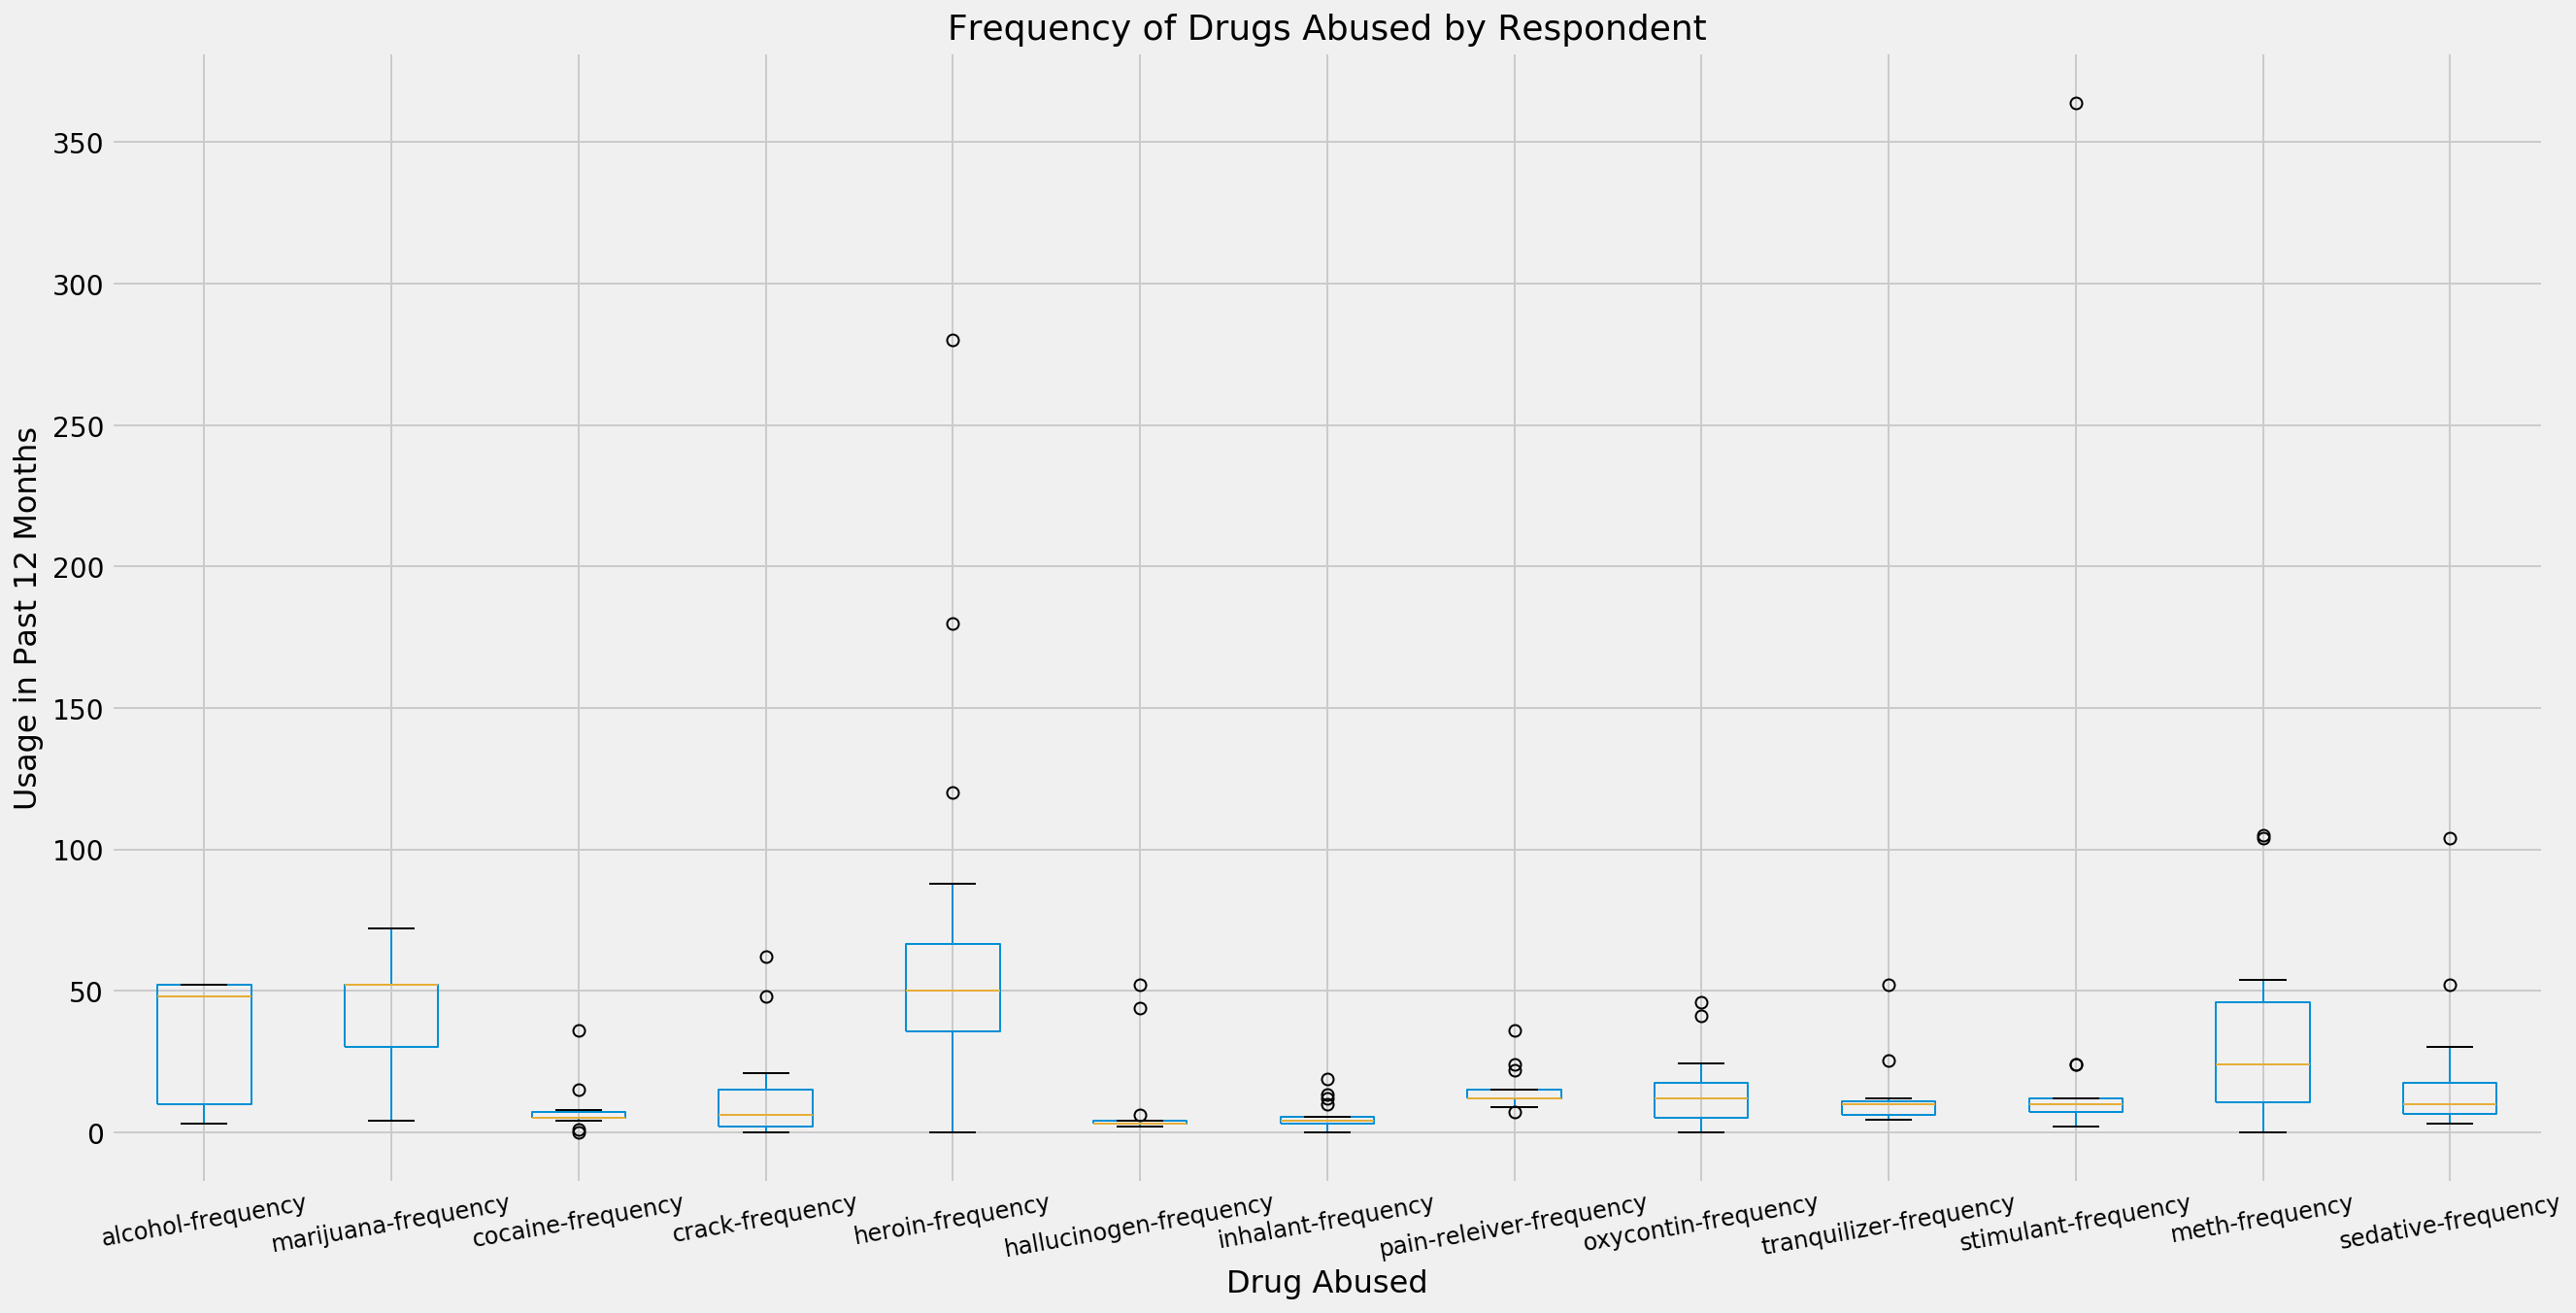

In [50]:
ax =abuse_frequency.boxplot(figsize=(20,10))
# plt.xticks(range(0,17), abuse_ratio['age'])
ax.set_title('Frequency of Drugs Abused by Respondent', fontsize=18, y=1)
ax.set_xlabel('Drug Abused', fontsize=16)
ax.set_ylabel('Usage in Past 12 Months', fontsize=16)

plt.xticks(rotation=10, fontsize = 12)


Text(0, 0.5, 'Usage in Past 12 Months')

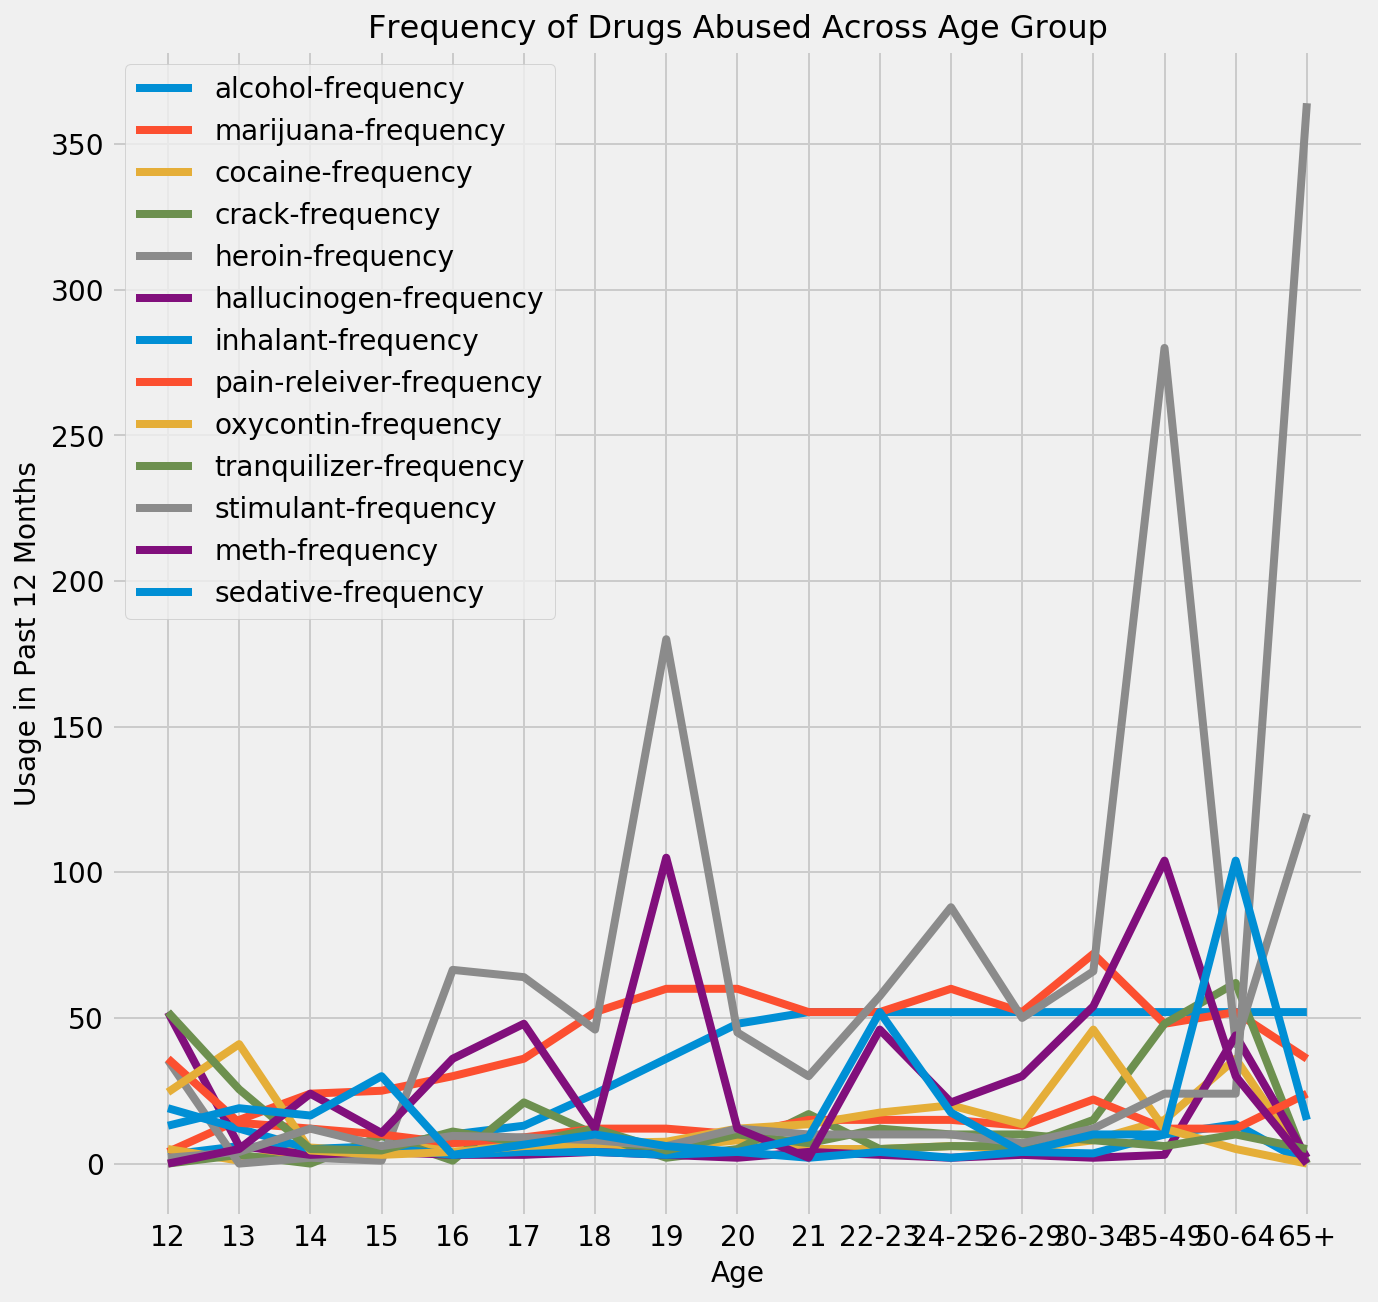

In [51]:
ax = abuse_frequency.plot(figsize=(10,10))
plt.xticks(range(0,17), abuse_frequency['age'])
ax.set_title('Frequency of Drugs Abused Across Age Group', fontsize=16, y=1)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Usage in Past 12 Months', fontsize=14)

In [52]:
abuse_frequency.corr()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
alcohol-frequency,1.000000,0.818769,0.317172,0.364267,0.432405,-0.174622,-0.351677,0.007087,0.049388,-0.415026,0.260304,0.252246,0.201423
marijuana-frequency,0.818769,1.000000,0.265193,0.273167,0.346001,-0.380430,-0.537857,-0.285292,0.066200,-0.591449,-0.069454,0.417947,0.048777
cocaine-frequency,0.317172,0.265193,1.000000,0.872260,0.143095,0.537645,0.413751,-0.179859,-0.154491,-0.103142,-0.183692,0.240660,0.761572
crack-frequency,0.364267,0.273167,0.872260,1.000000,0.335815,0.341344,0.350775,-0.218321,-0.115546,-0.215342,-0.125405,0.346559,0.602101
heroin-frequency,0.432405,0.346001,0.143095,0.335815,1.000000,-0.188085,-0.089068,-0.033484,-0.148807,-0.264485,0.218212,0.782122,-0.191638
hallucinogen-frequency,-0.174622,-0.380430,0.537645,0.341344,-0.188085,1.000000,0.834993,0.547363,0.061814,0.705734,-0.103980,-0.224738,0.533095
inhalant-frequency,-0.351677,-0.537857,0.413751,0.350775,-0.089068,0.834993,1.000000,0.420682,0.291686,0.766372,-0.296318,-0.075928,0.376364
pain-releiver-frequency,0.007087,-0.285292,-0.179859,-0.218321,-0.033484,0.547363,0.420682,1.000000,0.410163,0.699282,0.324717,-0.291527,-0.045213
oxycontin-frequency,0.049388,0.066200,-0.154491,-0.115546,-0.148807,0.061814,0.291686,0.410163,1.000000,0.433366,-0.292730,-0.028618,-0.113600
tranquilizer-frequency,-0.415026,-0.591449,-0.103142,-0.215342,-0.264485,0.705734,0.766372,0.699282,0.433366,1.000000,-0.180415,-0.360901,-0.014524


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]), <a list of 13 Text xticklabel objects>)

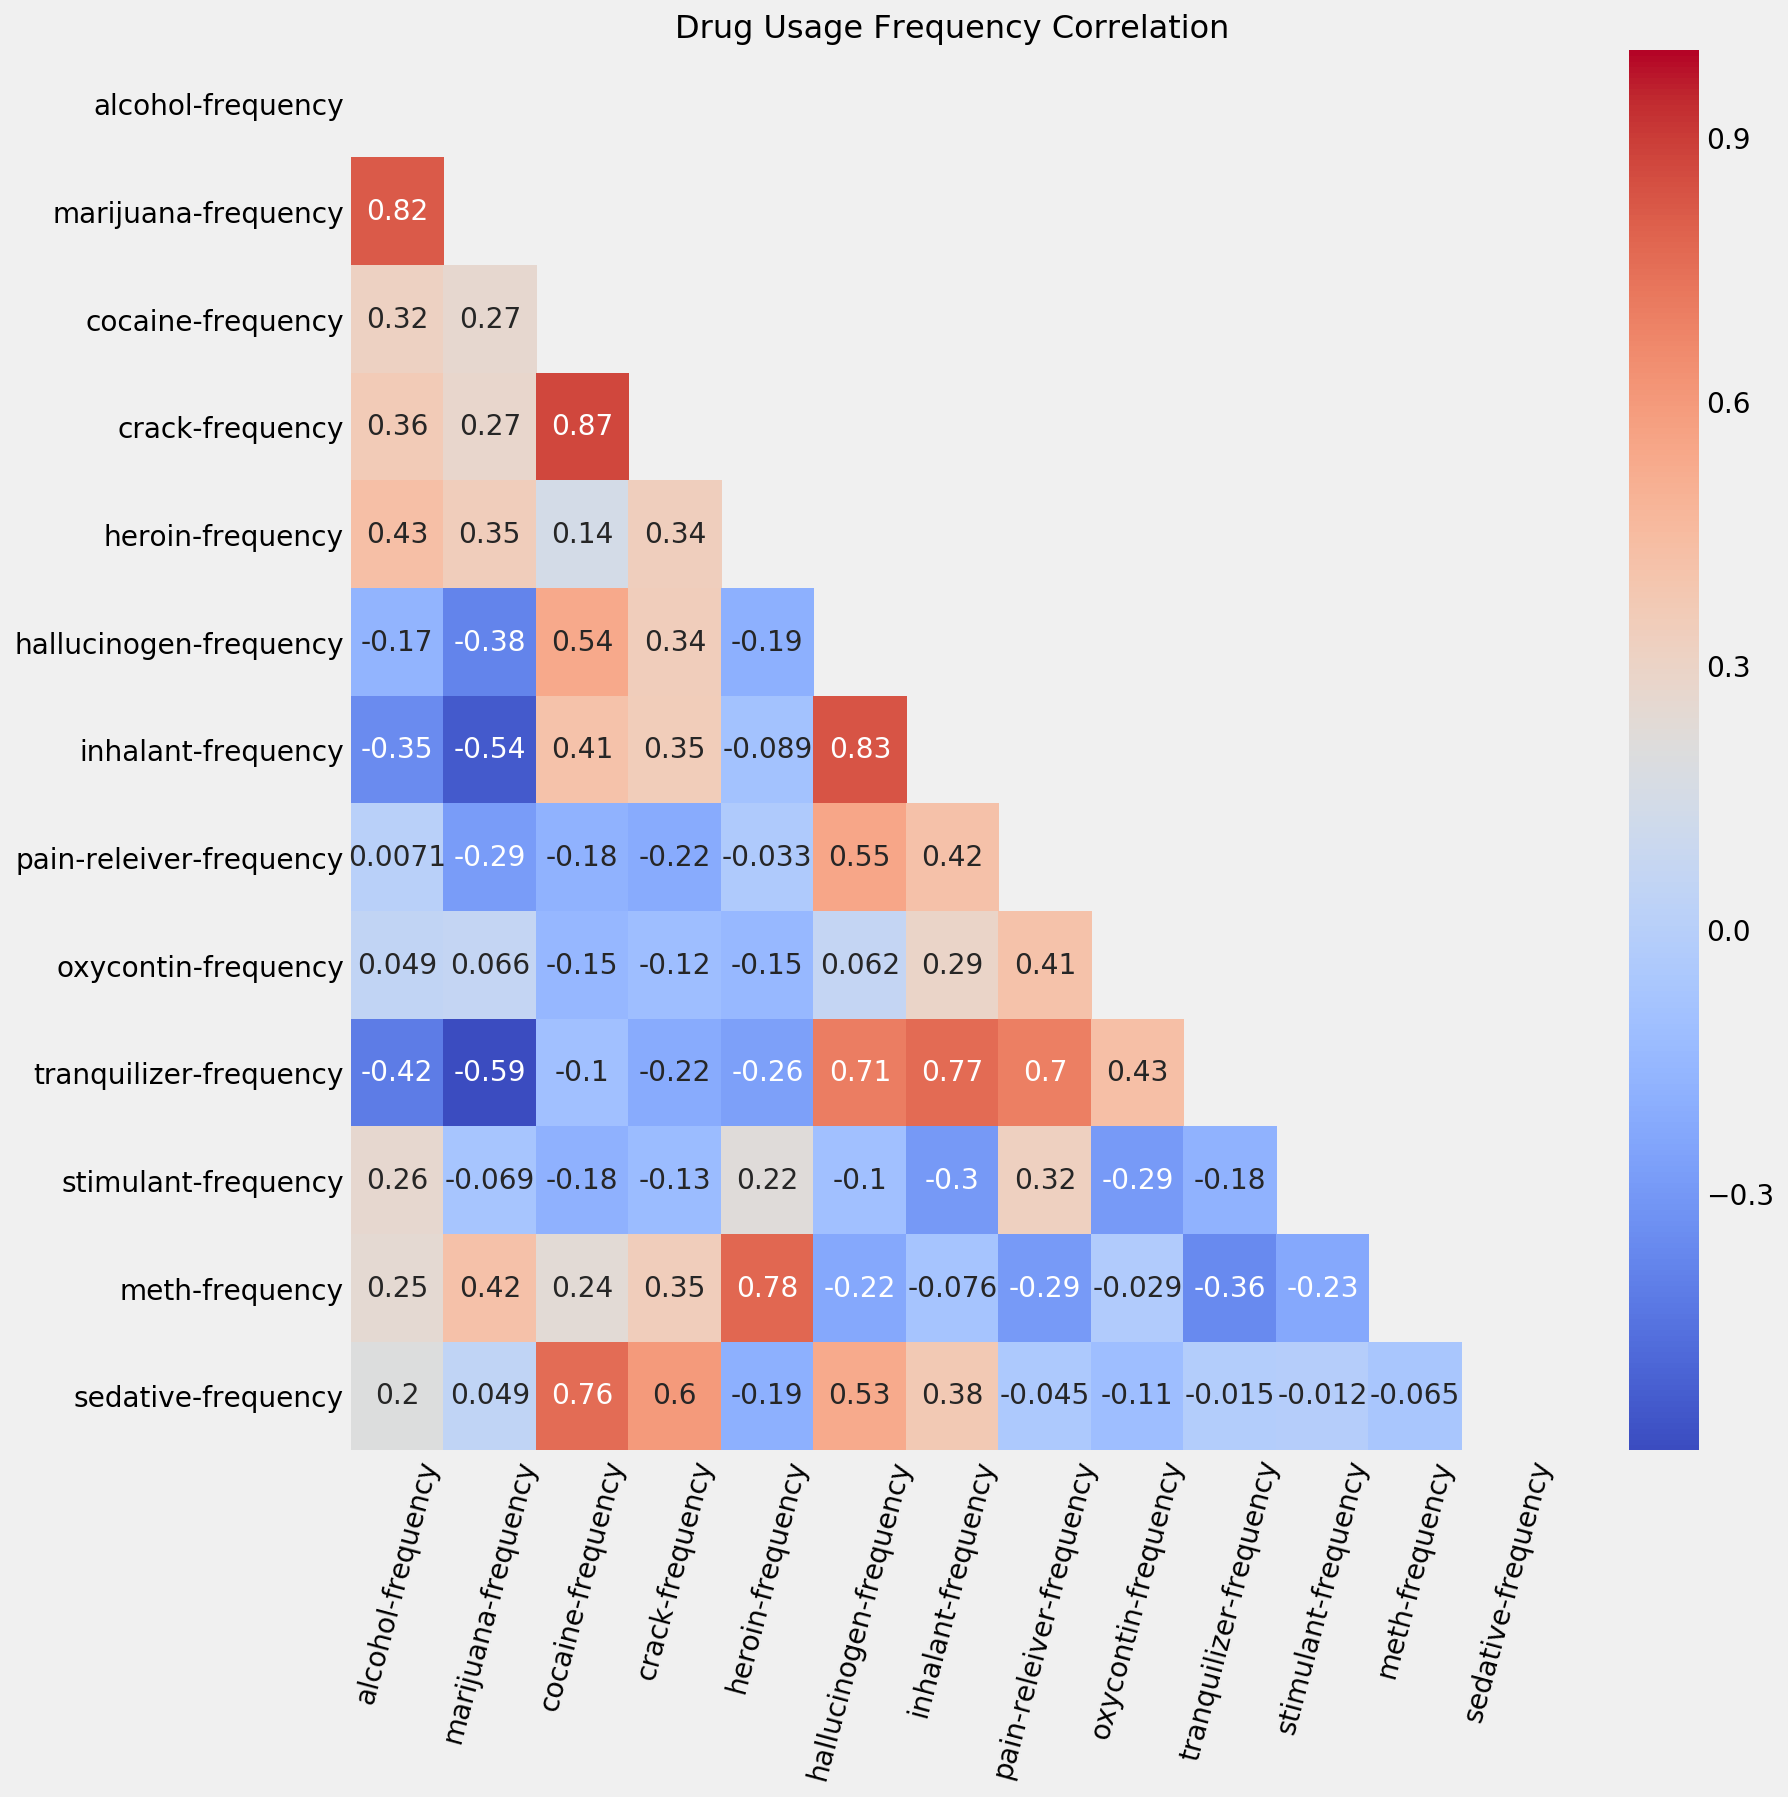

In [53]:
fig, ax = plt.subplots(figsize=(12,12))
plt.title('Drug Usage Frequency Correlation', fontsize=16)
abuse_frequency = abuse_frequency.corr()
mask = np.zeros_like(abuse_ratio, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(abuse_frequency, mask=mask, annot=True, cmap='coolwarm')
plt.xticks(rotation=75)

Text(0.5, 1.0, 'Frequency of Marijuana Abuse vs Alcohol Abuse')

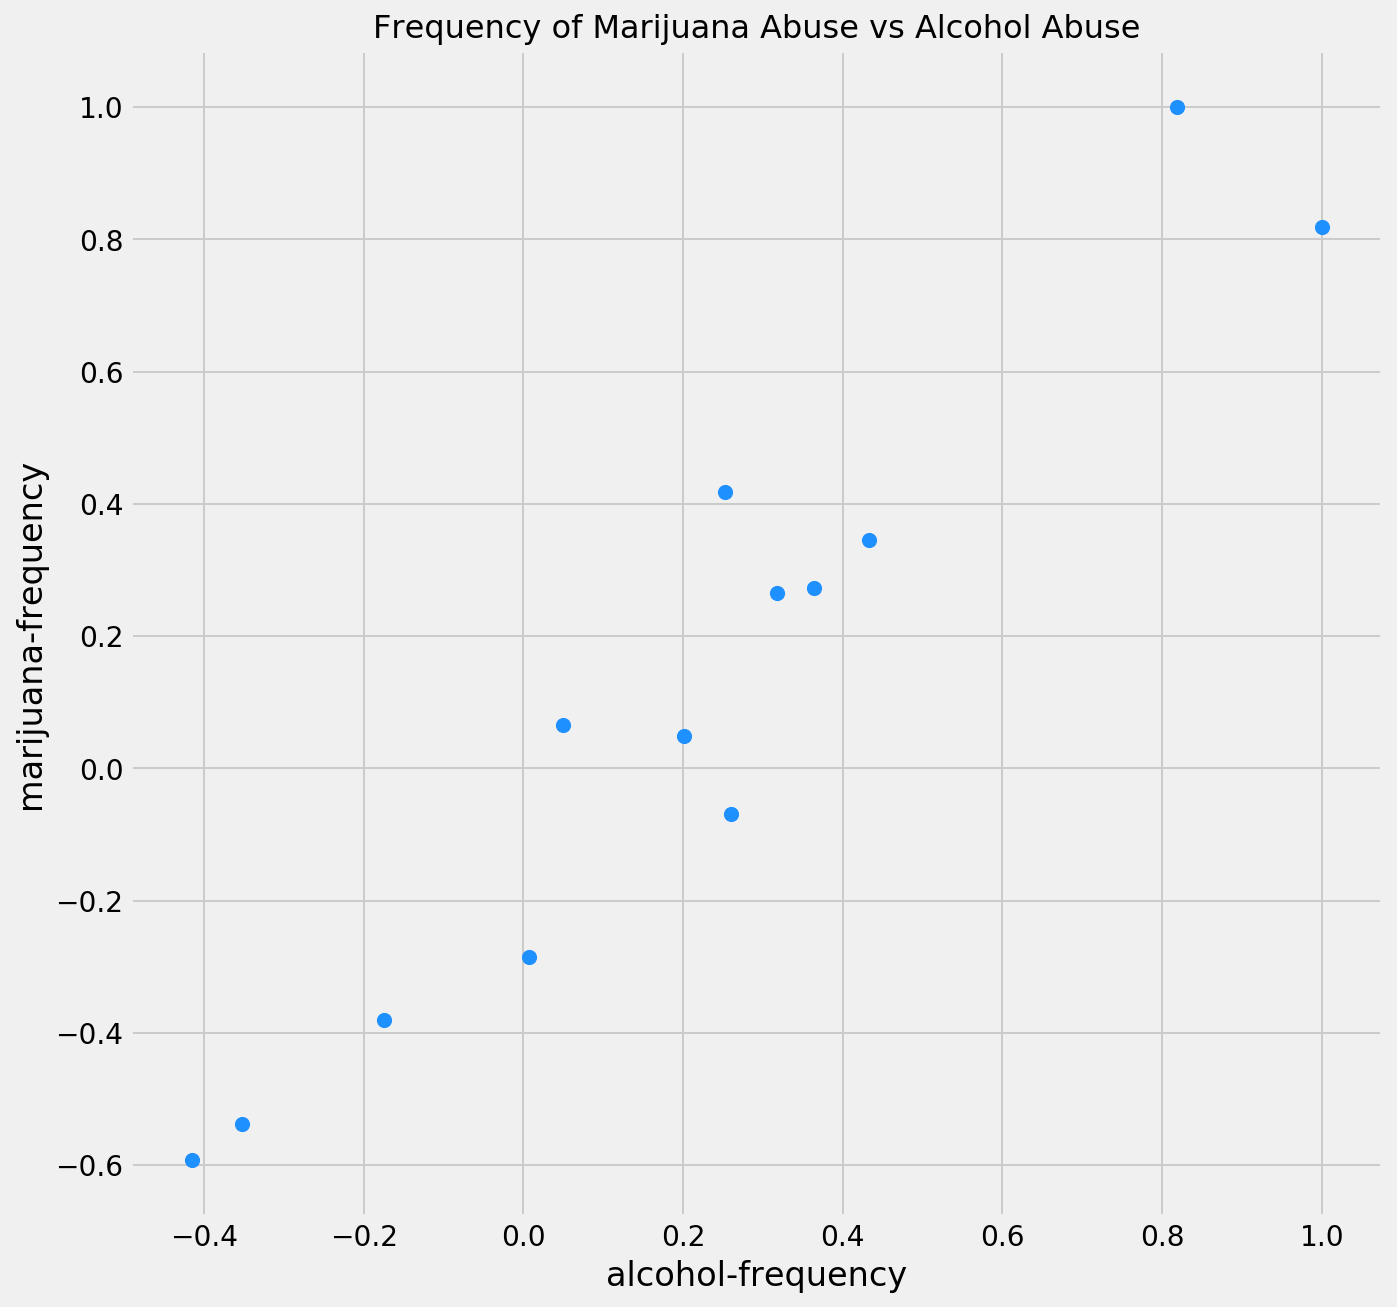

In [54]:
ax = abuse_frequency.plot(kind='scatter', x='alcohol-frequency', y='marijuana-frequency', 
                          c='dodgerblue', figsize=(10,10), s=50)
plt.title('Frequency of Marijuana Abuse vs Alcohol Abuse', fontsize=16)

There is a strong positive correlation between frequency of marijuana usage and alcohol usage.